In [1]:
import pandas as pd 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [2]:
#df = pd.read_csv('BRFSS_cleaned2.csv', index_col = 0)

In [3]:
#df['DrinkOccasionsPerDay'] = df['DrinkOccasionsPerDay'].astype(float)
#df['isObese'] = df['isObese'].astype(object)

In [4]:
#feature engineering lowest importance
#columns_drop = ['HIVRisk', 'isObese', 'DifficultyConcentrating', 'HadAsthma', 'Blind', 'HadDepressiveDisorder', 'TestedForHIV','AlcoholLast30days','HadSkinCancer','DifficultyDressingOrBathing','FluShotLast12Months','DifficultyAloneErrands']

In [2]:
df = df.drop(columns=columns_drop)

NameError: name 'df' is not defined

In [2]:
categorical_columns = ['State','Sex','GeneralHealth','ExerciseLast30days','LastCheckup','HadHeartAttack','HadAngina','HadStroke',
                    'HadCOPD','HadKidneyDisease','HadArthritis','HadDiabetes','Deaf','DifficultyWalking',
                    'EcigUsage','HadChestScan', 'HadPneumoniaShot','HadTetanusShot','HadCovid','RaceEthnicityGroup',
                    'AgeGroup5yrs','LevelOfSmoker', 'Smoked']

In [6]:
#df.to_csv('preprocessed2.csv')

In [3]:
df = pd.read_csv('preprocessed2.csv', index_col = 0)

In [ ]:
df = df.drop(columns=columns_drop)

In [4]:
X = df.drop(columns =['HeartDisease'], axis = 1)
y = df['HeartDisease']

In [5]:
X

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckup,ExerciseLast30days,SleepTime,HadHeartAttack,HadAngina,...,HadTetanusShot,HadCovid,RaceEthnicityGroup,AgeGroup5yrs,Height,Weight,BMI,LevelOfSmoker,DrinkOccasionsPerDay,Smoked
1,Alabama,Female,Excellent,0.0,0.0,Never,No,6.0,No,No,...,"No, did not receive any tetanus shot in the pa...",No,"White only, non-Hispanic",Age 80 or older,1.60,68.04,26.57,Never smoked,0.0,Never smoked
2,Alabama,Female,Very Good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,No,No,...,NaN,Yes,"White only, non-Hispanic",Age 55 to 59,1.57,63.50,25.61,Never smoked,0.0,Never smoked
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,...,"No, did not receive any tetanus shot in the pa...",No,"White only, non-Hispanic",Age 65 to 69,1.65,63.50,23.30,Current smoker - now smokes some days,0.0,Smoked
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,No,No,...,"No, did not receive any tetanus shot in the pa...",No,"White only, non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Never smoked,10.0,Never smoked
5,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,Yes,No,...,"No, did not receive any tetanus shot in the pa...",No,"White only, non-Hispanic",Age 80 or older,1.80,84.82,26.08,Never smoked,0.0,Never smoked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,No,No,...,"No, did not receive any tetanus shot in the pa...",Yes,"Black only, non-Hispanic",Age 18 to 24,1.65,69.85,25.63,Never smoked,3.0,Never smoked
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,...,"Yes, received tetanus shot but not sure what type",No,"Black only, non-Hispanic",Age 50 to 54,1.70,83.01,28.66,Never smoked,0.0,Never smoked
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,No,No,...,"No, did not receive any tetanus shot in the pa...",No,NaN,Age 65 to 69,1.70,49.90,17.23,Current smoker - now smokes every day,3.0,Smoked
445130,Virgin Islands,Male,Very Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,Yes,No,...,"No, did not receive any tetanus shot in the pa...",Yes,"Black only, non-Hispanic",Age 70 to 74,1.83,108.86,32.55,Never smoked,0.0,Never smoked


In [5]:
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

NameError: name 'categorical_columns' is not defined

In [6]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123,stratify=y)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(292193, 30)
(73049, 30)
(292193,)
(73049,)


In [10]:
X_train_enc = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_enc = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

In [11]:
print(X_train_enc.shape)
print(X_test_enc.shape)
print(y_train.shape)
print(y_test.shape)

(292193, 113)
(73049, 113)
(292193,)
(73049,)


In [5]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [6]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'MaxAbsScaler': MaxAbsScaler()
}

# Dictionary to store evaluation results
results = {}

# Evaluate each scaler
for scaler_name, scaler in scalers.items():
    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_scaled, y_train)
    
    # Predict on the test data
    y_pred = knn.predict(X_test_scaled)
    
    # Evaluate the model
    report = classification_report(y_test, y_pred, output_dict=True)
    results[scaler_name] = {
        'accuracy': report['accuracy'],
        'recall': report['macro avg']['recall']  # Use 'macro avg' to get the average recall
    }

# Print the results
for scaler_name, metrics in results.items():
    print(f"{scaler_name}: Accuracy = {metrics['accuracy']:.4f}, Recall = {metrics['recall']:.4f}")


StandardScaler: Accuracy = 0.9660, Recall = 0.8190
MinMaxScaler: Accuracy = 0.9537, Recall = 0.7552
RobustScaler: Accuracy = 0.9410, Recall = 0.6914
MaxAbsScaler: Accuracy = 0.9537, Recall = 0.7550


In [ ]:
#f-beta score, recall 2
# f1 score

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # Manhattan distance (p=1) and Euclidean distance (p=2)
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform Grid Search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best model
best_knn = grid_search.best_estimator_

# Evaluate the model
accuracy = best_knn.score(X_test_scaled, y_test)
print(f"Test set accuracy: {accuracy:.2f}")

NameError: name 'categorical_columns' is not defined

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'weights': ['uniform', 'distance'],
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform Grid Search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best model
best_knn = grid_search.best_estimator_

# Evaluate the model
accuracy = best_knn.score(X_test_scaled, y_test)
print(f"Test set accuracy: {accuracy:.2f}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'weights': 'distance'}
Test set accuracy: 0.96


In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 10, 20],
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform Grid Search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best model
best_knn = grid_search.best_estimator_

# Evaluate the model
accuracy = best_knn.score(X_test_scaled, y_test)
print(f"Test set accuracy: {accuracy:.2f}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'n_neighbors': 3}
Test set accuracy: 0.97


In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'p': [1, 2]
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform Grid Search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best model
best_knn = grid_search.best_estimator_

# Evaluate the model
accuracy = best_knn.score(X_test_scaled, y_test)
print(f"Test set accuracy: {accuracy:.2f}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'p': 2}
Test set accuracy: 0.96


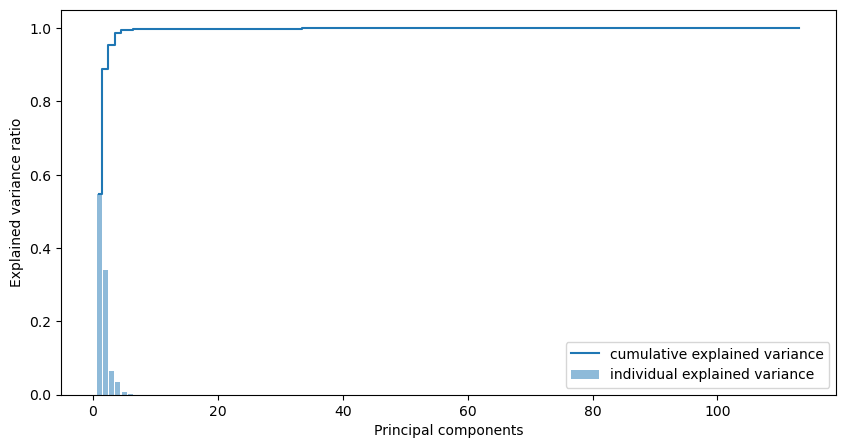

Number of components to retain 95% variance: 3


In [17]:
# Perform PCA
pca = PCA()
pca.fit(X_train)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

# Choose the number of components
threshold = 0.95  # 95% variance
num_components = np.argmax(cumulative_variance >= threshold) + 1
print(f'Number of components to retain 95% variance: {num_components}')

In [10]:
# Generate sample data for demonstration
num_features = X.shape[1]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA(n_components=3)  # Use the number of components that retains 95% variance
pca.fit(X_scaled)

# Get loadings (components)
loadings = pca.components_.T

# Debug prints to check shapes
print("Shape of X:", X.shape)
print("Shape of X_scaled:", X_scaled.shape)
print("Shape of loadings:", loadings.shape)

# Ensure the number of labels matches the number of features
feature_labels = [f'Feature{i+1}' for i in range(num_features)]

# Create a DataFrame for better readability
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=feature_labels)
print(loadings_df)

# Identify the most influential features
top_features_per_component = {}
for col in loadings_df.columns:
    top_features_per_component[col] = loadings_df[col].abs().sort_values(ascending=False).head(5).index.tolist()

print("Top features for each principal component:")
for component, features in top_features_per_component.items():
    print(f"{component}: {features}")

Shape of X: (365242, 113)
Shape of X_scaled: (365242, 113)
Shape of loadings: (113, 3)
                 PC1       PC2       PC3
Feature1    0.256658  0.109238  0.160018
Feature2    0.094586  0.013311  0.205357
Feature3    0.001864  0.016976 -0.157537
Feature4   -0.028127 -0.274852  0.126092
Feature5    0.099502 -0.119904  0.324576
...              ...       ...       ...
Feature109  0.111061  0.082996 -0.180701
Feature110  0.035052 -0.102429  0.084004
Feature111  0.209610 -0.373443 -0.075929
Feature112 -0.247920  0.433268 -0.000527
Feature113  0.248558 -0.435049  0.000403

[113 rows x 3 columns]
Top features for each principal component:
PC1: ['Feature81', 'Feature1', 'Feature76', 'Feature113', 'Feature112']
PC2: ['Feature113', 'Feature112', 'Feature111', 'Feature4', 'Feature61']
PC3: ['Feature97', 'Feature5', 'Feature6', 'Feature94', 'Feature86']


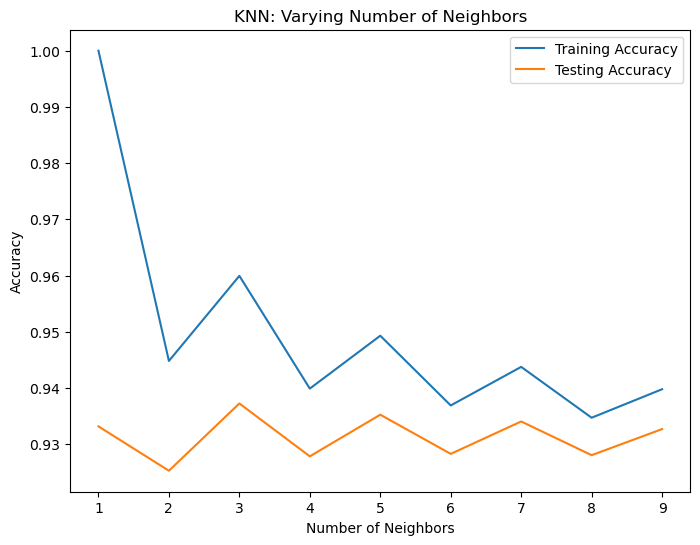

In [8]:
import matplotlib.pyplot as plt

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 10)

for neighbor in neighbors:    
    knn = KNeighborsClassifier(n_neighbors=neighbor)    
    knn.fit(X_train, y_train)    
    train_accuracies[neighbor] = knn.score(X_train, y_train)    
    test_accuracies[neighbor] = knn.score(X_test, y_test)


plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [15]:
pca3column = [
    'DifficultyWalking_Yes', 'HadArthritis_Yes', 'LevelOfSmoker_Never smoked', 
    'Smoked_Smoked', 'LevelOfSmoker_Former smoker', 'Sex_Male', 
    'RaceEthnicityGroup_White only, non-Hispanic', 'RaceEthnicityGroup_Hispanic', 
    'HadPneumoniaShot_Yes'
]



In [18]:
X_train_enc = X_train_enc[pca3column]

In [19]:
X_train_enc

,DifficultyWalking_Yes,PhysicalHealthDays,HadArthritis_Yes,LevelOfSmoker_Never smoked,Smoked_Smoked,LevelOfSmoker_Former smoker,Height,Sex_Male,"RaceEthnicityGroup_White only, non-Hispanic",Weight,BMI,RaceEthnicityGroup_Hispanic,HadPneumoniaShot_Yes
335728,0,0.0,0,1,0,0,1.78,1,0,72.57,22.96,0,0
420438,1,0.0,1,0,1,0,1.55,0,0,82.55,34.39,0,0
154878,0,0.0,1,0,1,1,1.50,0,1,68.04,30.30,0,0
275255,0,3.0,1,0,1,1,1.83,1,0,97.52,29.16,1,0
349371,0,0.0,0,0,1,0,1.80,1,0,73.48,22.59,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11844,0,30.0,1,1,0,0,1.60,0,1,79.38,31.00,0,1
296762,0,2.0,0,0,1,0,1.65,1,1,113.40,41.60,0,0
429796,0,2.0,0,1,0,0,1.83,0,1,63.50,18.99,0,1
300101,0,0.0,0,1,0,0,1.73,1,1,87.54,29.35,0,0


In [14]:
feature_labels = [f'Feature{i+1}' for i in range(X.shape[1])]
column_names = X.columns

# Create tuples where the value is 'Feature' + number
list = [(name, f'Feature{i+1}') for i, name in enumerate(column_names)]

# Print the tuples
print(list)

[('PhysicalHealthDays', 'Feature1'), ('MentalHealthDays', 'Feature2'), ('SleepTime', 'Feature3'), ('Height', 'Feature4'), ('Weight', 'Feature5'), ('BMI', 'Feature6'), ('DrinkOccasionsPerDay', 'Feature7'), ('State_Alaska', 'Feature8'), ('State_Arizona', 'Feature9'), ('State_Arkansas', 'Feature10'), ('State_California', 'Feature11'), ('State_Colorado', 'Feature12'), ('State_Connecticut', 'Feature13'), ('State_Delaware', 'Feature14'), ('State_District of Columbia', 'Feature15'), ('State_Florida', 'Feature16'), ('State_Georgia', 'Feature17'), ('State_Guam', 'Feature18'), ('State_Hawaii', 'Feature19'), ('State_Idaho', 'Feature20'), ('State_Illinois', 'Feature21'), ('State_Indiana', 'Feature22'), ('State_Iowa', 'Feature23'), ('State_Kansas', 'Feature24'), ('State_Kentucky', 'Feature25'), ('State_Louisiana', 'Feature26'), ('State_Maine', 'Feature27'), ('State_Maryland', 'Feature28'), ('State_Massachusetts', 'Feature29'), ('State_Michigan', 'Feature30'), ('State_Minnesota', 'Feature31'), ('Sta

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#fit the model
knn = KNeighborsClassifier(n_neighbors=3,p= 2, weights = 'distance')
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

Classification Report:
               precision    recall  f1-score   support

          No       0.96      1.00      0.98     66264
         Yes       1.00      0.63      0.77      6785

    accuracy                           0.97     73049
   macro avg       0.98      0.82      0.88     73049
weighted avg       0.97      0.97      0.96     73049



In [16]:
# ROC Curve and AUC Score (for binary classification)
if len(knn.classes_) == 2:
    y_prob = knn.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)  # Specify pos_label as 'Yes'
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("ROC Curve and AUC Score are not available for multi-class classification.")

ValueError: y_true takes value in {'No', 'Yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     66264
           1       1.00      0.63      0.77      6785

    accuracy                           0.97     73049
   macro avg       0.98      0.82      0.88     73049
weighted avg       0.97      0.97      0.96     73049



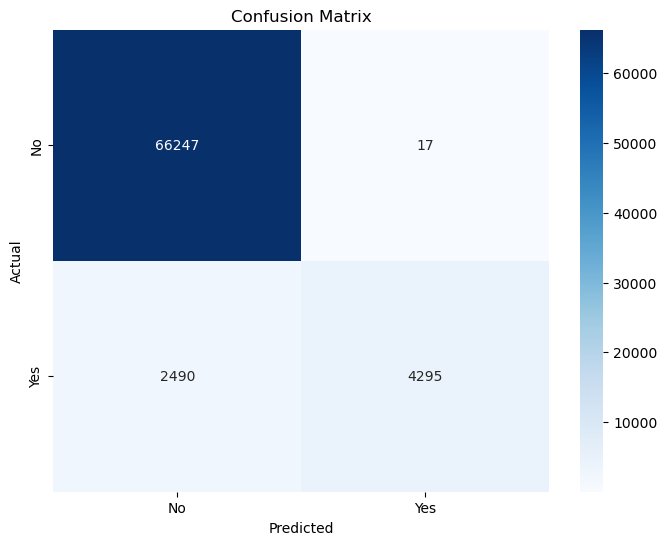

Accuracy Score: 0.9656805705759148


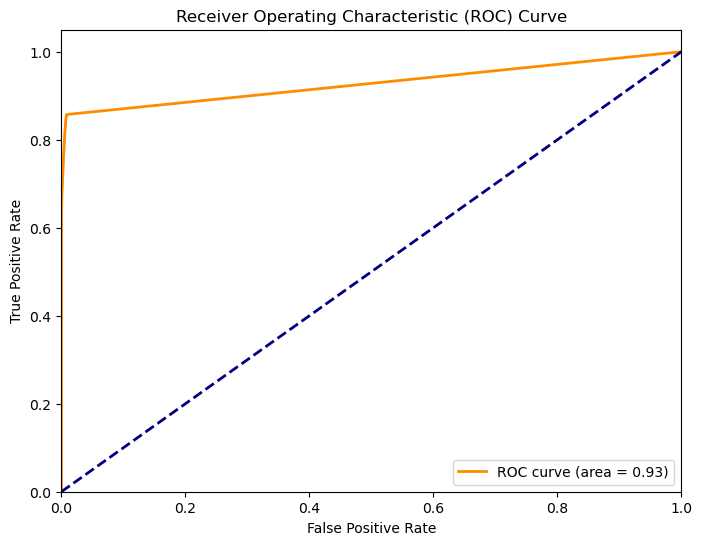

In [17]:
from sklearn.preprocessing import LabelEncoder

# Convert y_test and y_train to numeric values
le = LabelEncoder()
y_train_numeric = le.fit_transform(y_train)
y_test_numeric = le.transform(y_test)

# Fit the model with numeric labels
knn.fit(X_train_scaled, y_train_numeric)
y_pred_numeric = knn.predict(X_test_scaled)

# Generate the classification report
report = classification_report(y_test_numeric, y_pred_numeric)
print("Classification Report:\n", report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_numeric, y_pred_numeric)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate the accuracy score
accuracy = accuracy_score(y_test_numeric, y_pred_numeric)
print("Accuracy Score:", accuracy)

# ROC Curve and AUC Score (for binary classification)
if len(knn.classes_) == 2:
    y_prob = knn.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_numeric, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("ROC Curve and AUC Score are not available for multi-class classification.")

In [22]:



# Define the hyperparameters to tune
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_numeric)

# Get the best model
best_log_reg = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:\n", grid_search.best_params_)

# Predict on the test set
y_pred_numeric = best_log_reg.predict(X_test_scaled)

# Generate the classification report
report = classification_report(y_test_numeric, y_pred_numeric)
print("Classification Report:\n", report)

# Calculate the accuracy score
accuracy = accuracy_score(y_test_numeric, y_pred_numeric)
print("Accuracy Score:", accuracy)

Best Hyperparameters:
 {'solver': 'newton-cg'}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     66264
           1       1.00      1.00      1.00      6785

    accuracy                           1.00     73049
   macro avg       1.00      1.00      1.00     73049
weighted avg       1.00      1.00      1.00     73049

Accuracy Score: 1.0


In [5]:
# Assuming X, y, and categorical_columns are already defined
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Convert categorical columns to dummy variables
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)


In [20]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

# Define the logistic regression model
log_reg = LogisticRegression()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AgeGroup5yrs_Age 25 to 29
- AgeGroup5yrs_Age 30 to 34
- AgeGroup5yrs_Age 35 to 39
- AgeGroup5yrs_Age 40 to 44
- AgeGroup5yrs_Age 45 to 49
- ...


In [12]:
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00     66264
         Yes       1.00      1.00      1.00      6785

    accuracy                           1.00     73049
   macro avg       1.00      1.00      1.00     73049
weighted avg       1.00      1.00      1.00     73049

Accuracy Score: 1.0


In [ ]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01],
    'solver': ['newton-cg'],
    'max_iter': [100, 200, 300]
}

In [5]:
# Assuming X, y, and categorical_columns are already defined
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Convert categorical columns to dummy variables
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

In [8]:

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='Yes')
    rec = recall_score(y_test, y_pred, pos_label='Yes')
    f1 = f1_score(y_test, y_pred, pos_label='Yes')
    kappa = cohen_kappa_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)
    
    return {
        'acc': acc,
        'prec': prec,
        'rec': rec,
        'f1': f1,
        'kappa': kappa,
        'auc': auc,
        'cm': cm
    }

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    cohen_kappa_score, roc_auc_score, confusion_matrix
)

# Assuming X_train, y_train, X_test, y_test are already defined

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Define the evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='Yes')
    rec = recall_score(y_test, y_pred, pos_label='Yes')
    f1 = f1_score(y_test, y_pred, pos_label='Yes')
    kappa = cohen_kappa_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)
    
    return {
        'acc': acc,
        'prec': prec,
        'rec': rec,
        'f1': f1,
        'kappa': kappa,
        'auc': auc,
        'cm': cm
    }

# Evaluate the model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print the results
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.965653191693247
Precision: 0.9960556844547563
Recall: 0.6327192336035372
F1 Score: 0.7738621000450654
Cohens Kappa Score: 0.7562740667883874
Area Under Curve: 0.9269931628747287
Confusion Matrix:
 [[66247    17]
 [ 2492  4293]]


In [13]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])# Evaluate Model

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Cohens Kappa Score: 1.0
Area Under Curve: 1.0
Confusion Matrix:
 [[66264     0]
 [    0  6785]]


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assume X and y are your features and target variable

# Split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_res, y_train_res)

# Predict probabilities
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Precision-recall curve to find the best threshold
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba, pos_label='Yes')
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]

# Predict with the best threshold
y_pred_int = (y_pred_proba >= best_threshold).astype(int)
# Map integer predictions back to original labels
y_pred = np.where(y_pred_int == 1, 'Yes', 'No')

# Evaluate the model
print('Best threshold:', best_threshold)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=['No', 'Yes']))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Best threshold: 0.9998832247775635
ROC AUC Score: 1.0
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00     66264
         Yes       1.00      1.00      1.00      6785

    accuracy                           1.00     73049
   macro avg       1.00      1.00      1.00     73049
weighted avg       1.00      1.00      1.00     73049

Confusion Matrix:
 [[66264     0]
 [    0  6785]]
